In [9]:
!pip install pystan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 MB 47.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: httpstan
    Found existing installation: httpstan 4.6.1
    Uninstalling httpstan-4.6.1:
      Successfully uninstalled httpstan-4.6.1


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import stan # python3 -m pip install pystan
import nest_asyncio
nest_asyncio.apply()
import warnings
import arviz as az

In [2]:
# Define file paths
numbers_path = "dataframes/numbers.csv"
percentages_path = "dataframes/precentages.csv"
death_rates_path = "dataframes/death_rates.csv"

In [3]:
# Read the percentages CSV file
df = pd.read_csv(percentages_path, delimiter=';', header=0)
df = df.head(22)
df = df.drop(columns="[All]")
df.dtypes

Year       object
[0]        object
[1-4]      object
[5-9]      object
[10-14]    object
[15-19]    object
[20-24]    object
[25-29]    object
[30-34]    object
[35-39]    object
[40-44]    object
[45-49]    object
[50-54]    object
[55-59]    object
[60-64]    object
[65-69]    object
[70-74]    object
[75-79]    object
[80-84]    object
[85+]      object
dtype: object

In [4]:
df = df.map(lambda x: float(str(x).replace(',', '.')) if isinstance(x, str) else x)
df = df.map(lambda x: pd.to_numeric(str(x).replace(',', '.'), errors='coerce'))
df["Year"] = df["Year"].astype(int)
df = df.set_index("Year")

In [5]:
df = df.T

In [6]:
data = dict(
    N = 19,
    Y = 22,
    accidentData = df.values,
    xpred = 2022)

In [8]:
file_path = "stan/separate.stan"

# Read the Stan code from the file
with open(file_path, "r") as file:
    stan_code = file.read()

posterior1 = stan.build(stan_code, data=data)

Building...



Building: found in cache, done.

In [9]:
fit_separate = posterior1.sample(num_chains=4, num_samples=1000)
separate_df = fit_separate.to_frame()  # pandas `DataFrame, requires pandas

Sampling:   0%
Sampling:   0% (1/8000)
Sampling:   0% (2/8000)
Sampling:   0% (3/8000)
Sampling:   0% (4/8000)
Sampling:   1% (103/8000)
Sampling:   3% (202/8000)
Sampling:   4% (301/8000)
Sampling:   5% (400/8000)
Sampling:   6% (500/8000)
Sampling:   8% (600/8000)
Sampling:   9% (700/8000)
Sampling:  10% (800/8000)
Sampling:  11% (900/8000)
Sampling:  12% (1000/8000)
Sampling:  14% (1100/8000)
Sampling:  15% (1200/8000)
Sampling:  16% (1300/8000)
Sampling:  18% (1400/8000)
Sampling:  19% (1500/8000)
Sampling:  20% (1600/8000)
Sampling:  21% (1700/8000)
Sampling:  22% (1800/8000)
Sampling:  24% (1900/8000)
Sampling:  25% (2000/8000)
Sampling:  26% (2100/8000)
Sampling:  28% (2200/8000)
Sampling:  29% (2300/8000)
Sampling:  31% (2500/8000)
Sampling:  32% (2600/8000)
Sampling:  34% (2700/8000)
Sampling:  36% (2900/8000)
Sampling:  38% (3000/8000)
Sampling:  39% (3100/8000)
Sampling:  40% (3200/8000)
Sampling:  41% (3300/8000)
Sampling:  55% (4400/8000)
Sampling:  72% (5800/8000)
Samplin

In [11]:
file_path = "stan/pooled.stan"

# Read the Stan code from the file
with open(file_path, "r") as file:
    stan_code = file.read()

warnings.filterwarnings("ignore")

posterior2 = stan.build(stan_code, data=data)

Building...



Building: found in cache, done.

In [12]:
fit_pooled = posterior2.sample(num_chains=4, num_samples=1000)
pooled_df = fit_pooled.to_frame()  # pandas `DataFrame, requires pandas

Sampling:   0%
Sampling:   6% (500/8000)
Sampling:  16% (1300/8000)
Sampling:  41% (3300/8000)
Sampling:  66% (5300/8000)
Sampling:  85% (6800/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 0.000181 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.81 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000172 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.72 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000167 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.67 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000138 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.38 seconds.
  Adjust your expectations accordingly!


In [14]:
file_path = "stan/hierarchical.stan"

# Read the Stan code from the file
with open(file_path, "r") as file:
    stan_code = file.read()

warnings.filterwarnings("ignore")

posterior3 = stan.build(stan_code, data=data)

Building...



Building: found in cache, done.

In [15]:
fit_hier = posterior3.sample(num_chains=4, num_samples=1000)
hier_df = fit_hier.to_frame()  # pandas `DataFrame, requires pandas

Sampling:   0%
Sampling:   0% (1/8000)
Sampling:   0% (2/8000)
Sampling:   0% (3/8000)
Sampling:   0% (4/8000)
Sampling:   1% (103/8000)
Sampling:   4% (302/8000)
Sampling:   9% (701/8000)
Sampling:  12% (1000/8000)
Sampling:  19% (1500/8000)
Sampling:  25% (2000/8000)
Sampling:  45% (3600/8000)
Sampling:  66% (5300/8000)
Sampling:  84% (6700/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 0.000217 seconds
  1000 transitions using 10 leapfrog steps per transition would take 2.17 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000226 seconds
  1000 transitions using 10 leapfrog steps per transition would take 2.26 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000205 seconds
  1000 transitions using 10 leapfrog steps per transition would take 2.05 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000211 seconds
  1000 t

In [16]:
separate_df.describe()

parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha.1,alpha.2,alpha.3,...,pred.10,pred.11,pred.12,pred.13,pred.14,pred.15,pred.16,pred.17,pred.18,pred.19
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.0,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,387.833002,0.932710,0.056812,6.009250,67.544000,0.0,-359.246800,0.483837,10.720757,20.977999,...,5.107193,3.668330,2.665782,1.842427,1.219520,0.830482,0.559767,0.409747,0.288147,0.127652
std,5.761009,0.088351,0.002153,0.100831,16.609306,0.0,7.841949,0.036290,0.379697,0.673679,...,0.355844,0.298670,0.185202,0.135980,0.078700,0.061256,0.044531,0.037877,0.031844,0.012405
min,365.686433,0.176422,0.053976,5.000000,31.000000,0.0,-381.321712,0.329940,9.323337,18.131116,...,3.570525,2.619502,1.880930,1.213526,0.882068,0.530189,0.350533,0.264502,0.115776,0.087842
25%,384.207790,0.910195,0.055142,6.000000,63.000000,0.0,-364.748624,0.459976,10.479959,20.538484,...,4.873595,3.463693,2.543267,1.757158,1.168887,0.790842,0.530617,0.385340,0.267421,0.119315
50%,388.097473,0.965827,0.056981,6.000000,63.000000,0.0,-359.645209,0.483448,10.716076,20.976048,...,5.107169,3.668449,2.663650,1.843725,1.220865,0.830785,0.560351,0.410262,0.288348,0.127785
75%,391.871287,0.989114,0.058651,6.000000,63.000000,0.0,-354.003938,0.508561,10.968015,21.433369,...,5.340223,3.866490,2.785503,1.929723,1.269821,0.870627,0.588282,0.435453,0.308396,0.135772
max,405.035199,1.000000,0.059308,7.000000,191.000000,0.0,-328.741735,0.611417,12.343409,23.387383,...,6.779332,5.009088,3.495591,2.381470,1.521166,1.101224,0.721507,0.553114,0.422527,0.182383


In [22]:
pooled_df.describe()

parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta,sigma,...,pred.10,pred.11,pred.12,pred.13,pred.14,pred.15,pred.16,pred.17,pred.18,pred.19
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.0,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-1126.945272,0.921066,0.391410,2.709750,8.381500,0.0,1128.466387,9.990269,-0.187822,8.964835,...,5.776753,5.755138,5.572179,5.542799,5.511964,5.566977,5.662794,5.833423,5.672130,5.626766
std,1.248788,0.106964,0.041084,0.735622,4.400375,0.0,1.756859,0.880010,0.071000,0.316390,...,9.044137,9.105822,9.135735,9.060308,8.956014,8.972115,9.216007,8.986318,9.018436,8.896049
min,-1138.496555,0.140765,0.347459,1.000000,1.000000,0.0,1125.524058,7.009910,-0.447638,7.854384,...,-25.977539,-24.676973,-24.282255,-27.429305,-26.256989,-24.495122,-28.513149,-30.843401,-23.850657,-24.809249
25%,-1127.513629,0.891327,0.359307,2.000000,7.000000,0.0,1127.172508,9.394549,-0.236289,8.745115,...,-0.250898,-0.412968,-0.534985,-0.535275,-0.400015,-0.392511,-0.496967,-0.365782,-0.561660,-0.414829
50%,-1126.621987,0.966141,0.382007,3.000000,7.000000,0.0,1128.112111,10.001452,-0.186584,8.955360,...,5.659021,5.913747,5.771350,5.728151,5.763592,5.486069,5.663254,5.793868,5.667063,5.467616
75%,-1126.036167,0.994063,0.414110,3.000000,15.000000,0.0,1129.457391,10.585031,-0.139916,9.182290,...,11.752078,11.997885,11.786027,11.494593,11.334398,11.464622,11.823216,11.981180,11.747386,11.622850
max,-1125.382287,1.000000,0.454165,4.000000,31.000000,0.0,1138.668320,13.500131,0.047538,10.160563,...,41.726744,39.183015,35.619355,41.012627,40.472255,39.126428,36.221141,40.057079,35.874458,41.747190


In [31]:
pooled_df.describe()

parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta,sigma,...,pred.10,pred.11,pred.12,pred.13,pred.14,pred.15,pred.16,pred.17,pred.18,pred.19
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.0,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-1126.945272,0.921066,0.391410,2.709750,8.381500,0.0,1128.466387,9.990269,-0.187822,8.964835,...,5.776753,5.755138,5.572179,5.542799,5.511964,5.566977,5.662794,5.833423,5.672130,5.626766
std,1.248788,0.106964,0.041084,0.735622,4.400375,0.0,1.756859,0.880010,0.071000,0.316390,...,9.044137,9.105822,9.135735,9.060308,8.956014,8.972115,9.216007,8.986318,9.018436,8.896049
min,-1138.496555,0.140765,0.347459,1.000000,1.000000,0.0,1125.524058,7.009910,-0.447638,7.854384,...,-25.977539,-24.676973,-24.282255,-27.429305,-26.256989,-24.495122,-28.513149,-30.843401,-23.850657,-24.809249
25%,-1127.513629,0.891327,0.359307,2.000000,7.000000,0.0,1127.172508,9.394549,-0.236289,8.745115,...,-0.250898,-0.412968,-0.534985,-0.535275,-0.400015,-0.392511,-0.496967,-0.365782,-0.561660,-0.414829
50%,-1126.621987,0.966141,0.382007,3.000000,7.000000,0.0,1128.112111,10.001452,-0.186584,8.955360,...,5.659021,5.913747,5.771350,5.728151,5.763592,5.486069,5.663254,5.793868,5.667063,5.467616
75%,-1126.036167,0.994063,0.414110,3.000000,15.000000,0.0,1129.457391,10.585031,-0.139916,9.182290,...,11.752078,11.997885,11.786027,11.494593,11.334398,11.464622,11.823216,11.981180,11.747386,11.622850
max,-1125.382287,1.000000,0.454165,4.000000,31.000000,0.0,1138.668320,13.500131,0.047538,10.160563,...,41.726744,39.183015,35.619355,41.012627,40.472255,39.126428,36.221141,40.057079,35.874458,41.747190


In [18]:
hier_df.describe()

parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,mu_alpha,mu_beta,sigma_alpha,...,pred.10,pred.11,pred.12,pred.13,pred.14,pred.15,pred.16,pred.17,pred.18,pred.19
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.0,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-144.758862,0.862142,0.250865,4.246250,20.824000,0.0,166.336177,9.376461,-0.192217,11.975492,...,5.099136,3.637013,2.625388,1.814185,1.210189,0.804041,0.529958,0.377999,0.254430,0.128974
std,4.943308,0.125705,0.011662,0.435498,7.722171,0.0,6.862335,2.690719,0.068531,2.098676,...,0.854780,0.861344,0.851431,0.861206,0.838153,0.859222,0.846123,0.839189,0.868980,0.818458
min,-165.776282,0.347889,0.235161,3.000000,7.000000,0.0,145.348571,-0.737110,-0.474407,6.810143,...,2.358786,0.033752,-0.484036,-1.273079,-1.734171,-2.019627,-2.612131,-2.541358,-2.559493,-2.706221
25%,-147.807649,0.781466,0.244636,4.000000,15.000000,0.0,161.604050,7.639677,-0.236256,10.481019,...,4.523139,3.048329,2.065221,1.249210,0.642532,0.235534,-0.056833,-0.198443,-0.317831,-0.419126
50%,-144.397796,0.895549,0.250288,4.000000,15.000000,0.0,165.969662,9.421886,-0.192760,11.711519,...,5.089105,3.634076,2.623926,1.807726,1.205770,0.797111,0.536993,0.373319,0.255287,0.134039
75%,-141.331099,0.969097,0.256517,4.000000,31.000000,0.0,170.682468,11.195042,-0.148737,13.101319,...,5.675227,4.239064,3.184761,2.378193,1.772043,1.378606,1.103902,0.962465,0.827415,0.675119
max,-132.576751,1.000000,0.267723,5.000000,47.000000,0.0,194.833377,19.209471,0.086309,23.900884,...,8.081497,7.034063,5.659332,4.982279,4.532621,4.245290,3.119041,3.089267,3.370297,3.413196


In [16]:
alpha_columns = [col for col in separate_df.columns if col.startswith('alpha')]
beta_columns = [col for col in separate_df.columns if col.startswith('beta')]

# Extract alpha and beta as DataFrames
alpha_samples = separate_df[alpha_columns]
beta_samples = separate_df[beta_columns]

In [17]:
xpred = 2022
base_year = 2000
x_offset = xpred - base_year

# Calculate predictions
beta_samples = beta_samples.multiply(x_offset)



In [18]:
predictions = pd.DataFrame()
for i in range(1, 20):
    predictions[f'pred{i}'] = alpha_samples[f'alpha.{i}'] + beta_samples[f'beta.{i}']

# Summarize predictions
pred_mean = predictions.mean()  # Mean predictions
pred_cred = predictions.quantile([0.025, 0.975])  # 95% credible interval


#predictions

In [19]:
pred_mean # separate model

pred1      0.315038
pred2      7.194692
pred3     12.718583
pred4     11.107383
pred5     18.446414
pred6     16.788521
pred7     11.987256
pred8      8.661813
pred9      6.703978
pred10     5.164567
pred11     3.696857
pred12     2.665049
pred13     1.838735
pred14     1.218144
pred15     0.829753
pred16     0.562052
pred17     0.414977
pred18     0.293135
pred19     0.130653
dtype: float64

In [20]:
pred_cred # separate model

,pred1,pred2,pred3,pred4,pred5,pred6,pred7,pred8,pred9,pred10,pred11,pred12,pred13,pred14,pred15,pred16,pred17,pred18,pred19
0.025,0.235499,6.425488,11.347314,9.651078,16.863564,15.825084,11.304877,7.982203,6.291961,4.882521,3.465664,2.51555,1.735762,1.155547,0.781960,0.528588,0.385211,0.268503,0.120972
0.975,0.390794,7.983963,14.115801,12.560395,20.124066,17.772976,12.614383,9.345719,7.135329,5.434888,3.939283,2.81969,1.944465,1.279453,0.877228,0.596370,0.445849,0.318591,0.140210


In [21]:
alpha_columns = [col for col in pooled_df.columns if col.startswith('alpha')]
beta_columns = [col for col in pooled_df.columns if col.startswith('beta')]

# Extract alpha and beta as DataFrames
alpha_samples = pooled_df[alpha_columns]
beta_samples = pooled_df[beta_columns]

In [22]:
xpred = 2022
base_year = 2000
x_offset = xpred - base_year

# Calculate predictions
beta_samples = beta_samples.multiply(x_offset)

In [23]:
predictions = pd.DataFrame()

predictions['pred'] = alpha_samples['alpha'] + beta_samples['beta']

# Summarize predictions
pred_mean = predictions.mean()  # Mean predictions
pred_cred = predictions.quantile([0.025, 0.975])  # 95% credible interval

In [24]:
pred_mean # pooled model

pred    5.831993
dtype: float64

In [25]:
pred_cred # pooled model

,pred
0.025,3.981998
0.975,7.620365


In [26]:
alpha_columns = [col for col in hier_df.columns if col.startswith('alpha')]
beta_columns = [col for col in hier_df.columns if col.startswith('beta')]

# Extract alpha and beta as DataFrames
alpha_samples = hier_df[alpha_columns]
beta_samples = hier_df[beta_columns]

xpred = 2022
base_year = 2000
x_offset = xpred - base_year

# Calculate predictions
beta_samples = beta_samples.multiply(x_offset)

predictions = pd.DataFrame()
for i in range(1, 20):
    predictions[f'pred{i}'] = alpha_samples[f'alpha.{i}'] + beta_samples[f'beta.{i}']

# Summarize predictions
pred_mean = predictions.mean()  # Mean predictions
pred_cred = predictions.quantile([0.025, 0.975])  # 95% credible interval

In [27]:
pred_mean # hierarchical model

pred1      0.297630
pred2      7.187304
pred3     12.692573
pred4     11.088578
pred5     18.410927
pred6     16.821387
pred7     12.001555
pred8      8.663718
pred9      6.709884
pred10     5.154111
pred11     3.682826
pred12     2.648372
pred13     1.802119
pred14     1.198930
pred15     0.807731
pred16     0.535088
pred17     0.389041
pred18     0.258452
pred19     0.107755
dtype: float64

In [28]:
pred_cred # hierarchical model

,pred1,pred2,pred3,pred4,pred5,pred6,pred7,pred8,pred9,pred10,pred11,pred12,pred13,pred14,pred15,pred16,pred17,pred18,pred19
0.025,-0.376725,6.507519,12.024012,10.421790,17.731898,16.141664,11.345872,8.004940,6.043005,4.471468,3.032978,2.015571,1.150474,0.543628,0.146820,-0.121840,-0.258192,-0.388870,-0.569685
0.975,0.961916,7.877553,13.329275,11.765795,19.082204,17.483268,12.674516,9.318781,7.390030,5.830860,4.346625,3.298967,2.476754,1.875368,1.467644,1.182846,1.050611,0.904623,0.786214


In [101]:
hier_summary = az.summary(fit_hier)

In [102]:
hier_summary

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_alpha,9.376,2.691,4.215,14.380,0.037,0.026,5374.0,2677.0,1.0
mu_beta,-0.192,0.069,-0.324,-0.068,0.001,0.001,5248.0,2617.0,1.0
sigma_alpha,11.975,2.099,8.632,15.929,0.032,0.025,5223.0,2315.0,1.0
sigma_beta,0.294,0.055,0.200,0.393,0.001,0.001,5482.0,2777.0,1.0
sigma,0.770,0.028,0.715,0.821,0.000,0.000,4650.0,2702.0,1.0
...,...,...,...,...,...,...,...,...,...
pred[14],0.804,0.859,-0.843,2.384,0.014,0.010,3892.0,3649.0,1.0
pred[15],0.530,0.846,-1.028,2.147,0.013,0.010,4136.0,3737.0,1.0
pred[16],0.378,0.839,-1.171,1.919,0.013,0.009,4027.0,3799.0,1.0
pred[17],0.254,0.869,-1.333,1.940,0.014,0.010,3992.0,3892.0,1.0


In [43]:
values = tmp['r_hat'].values

In [46]:
ones = True
for i in values:
    if i != 1:
        print(i)
        ones = False
if ones:
    print('All r_hats are equal to 1')

All r_hats are equal to 1


In [98]:
pooled_summary = az.summary(fit_pooled)

In [99]:
pooled_summary

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,9.990,0.880,8.367,11.647,0.023,0.016,1460.0,1421.0,1.0
beta,-0.188,0.071,-0.320,-0.054,0.002,0.001,1566.0,1729.0,1.0
sigma,8.965,0.316,8.390,9.550,0.007,0.005,2245.0,2211.0,1.0
"mu[0, 0]",9.990,0.880,8.367,11.647,0.023,0.016,1460.0,1421.0,1.0
"mu[0, 1]",9.802,0.819,8.317,11.380,0.021,0.015,1471.0,1395.0,1.0
...,...,...,...,...,...,...,...,...,...
pred[14],5.567,8.972,-12.091,22.463,0.150,0.106,3580.0,3492.0,1.0
pred[15],5.663,9.216,-13.013,21.601,0.148,0.106,3879.0,3617.0,1.0
pred[16],5.833,8.986,-10.753,22.904,0.144,0.102,3896.0,3672.0,1.0
pred[17],5.672,9.018,-12.516,21.322,0.144,0.102,3945.0,3906.0,1.0


In [100]:
separate_summary = az.summary(fit_separate)
separate_summary

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha[0],0.484,0.036,0.411,0.547,0.001,0.000,3345.0,2407.0,1.0
alpha[1],10.721,0.380,10.010,11.421,0.009,0.006,2032.0,2041.0,1.0
alpha[2],20.978,0.674,19.714,22.256,0.014,0.010,2447.0,2316.0,1.0
alpha[3],22.942,0.691,21.720,24.281,0.014,0.010,2518.0,2853.0,1.0
alpha[4],39.397,0.762,37.963,40.829,0.015,0.011,2479.0,2396.0,1.0
...,...,...,...,...,...,...,...,...,...
pred[14],0.830,0.061,0.707,0.938,0.001,0.001,3800.0,3371.0,1.0
pred[15],0.560,0.045,0.473,0.641,0.001,0.000,4087.0,3526.0,1.0
pred[16],0.410,0.038,0.339,0.484,0.001,0.000,4027.0,3579.0,1.0
pred[17],0.288,0.032,0.228,0.349,0.001,0.000,3903.0,3620.0,1.0


In [50]:
ones = True
for i in values:
    if i != 1:
        print(i)
        ones = False
if ones:
    print('All r_hats are equal to 1')

All r_hats are equal to 1


In [51]:
tmp = az.summary(fit_separate)
vals = tmp['r_hat'].values
ones = True
for i in values:
    if i != 1:
        print(i)
        ones = False
if ones:
    print('All r_hats are equal to 1')

All r_hats are equal to 1


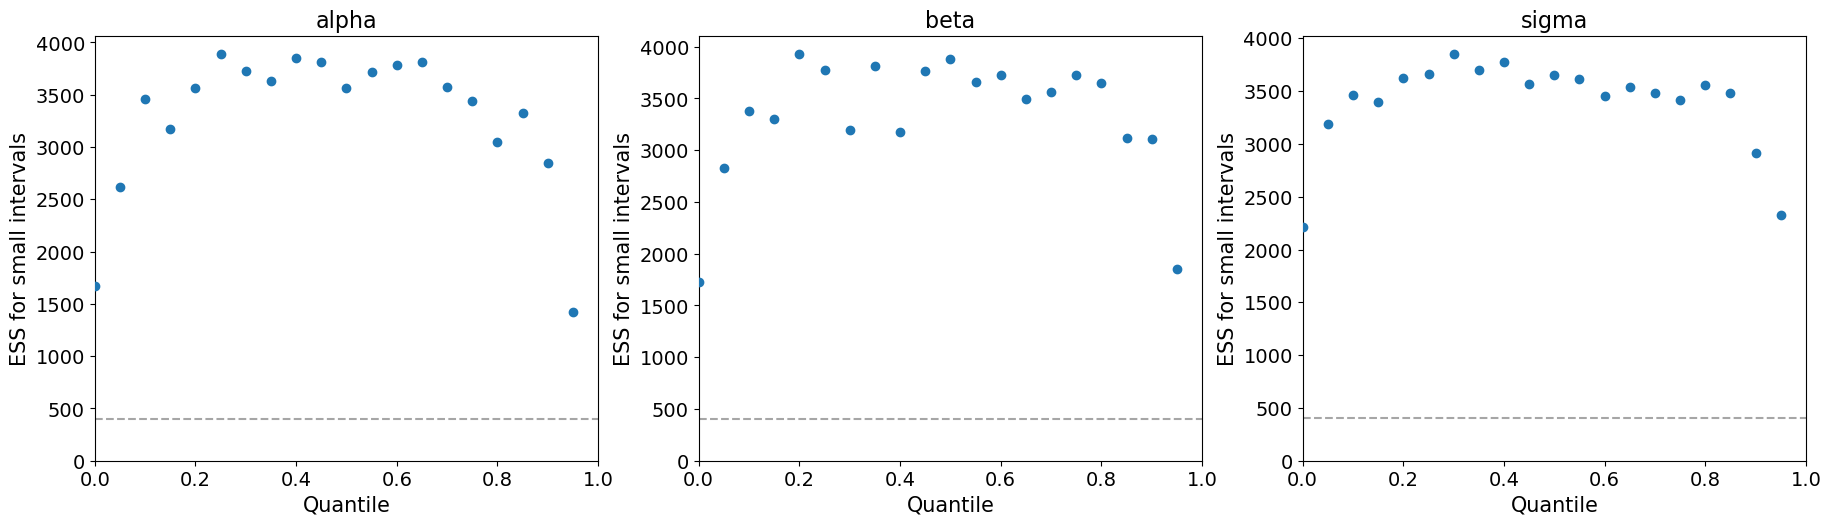

In [85]:
pooled_idata = az.from_pystan(posterior=fit_pooled)
az.plot_ess(pooled_idata, var_names=['alpha', 'beta', 'sigma'], kind='local');

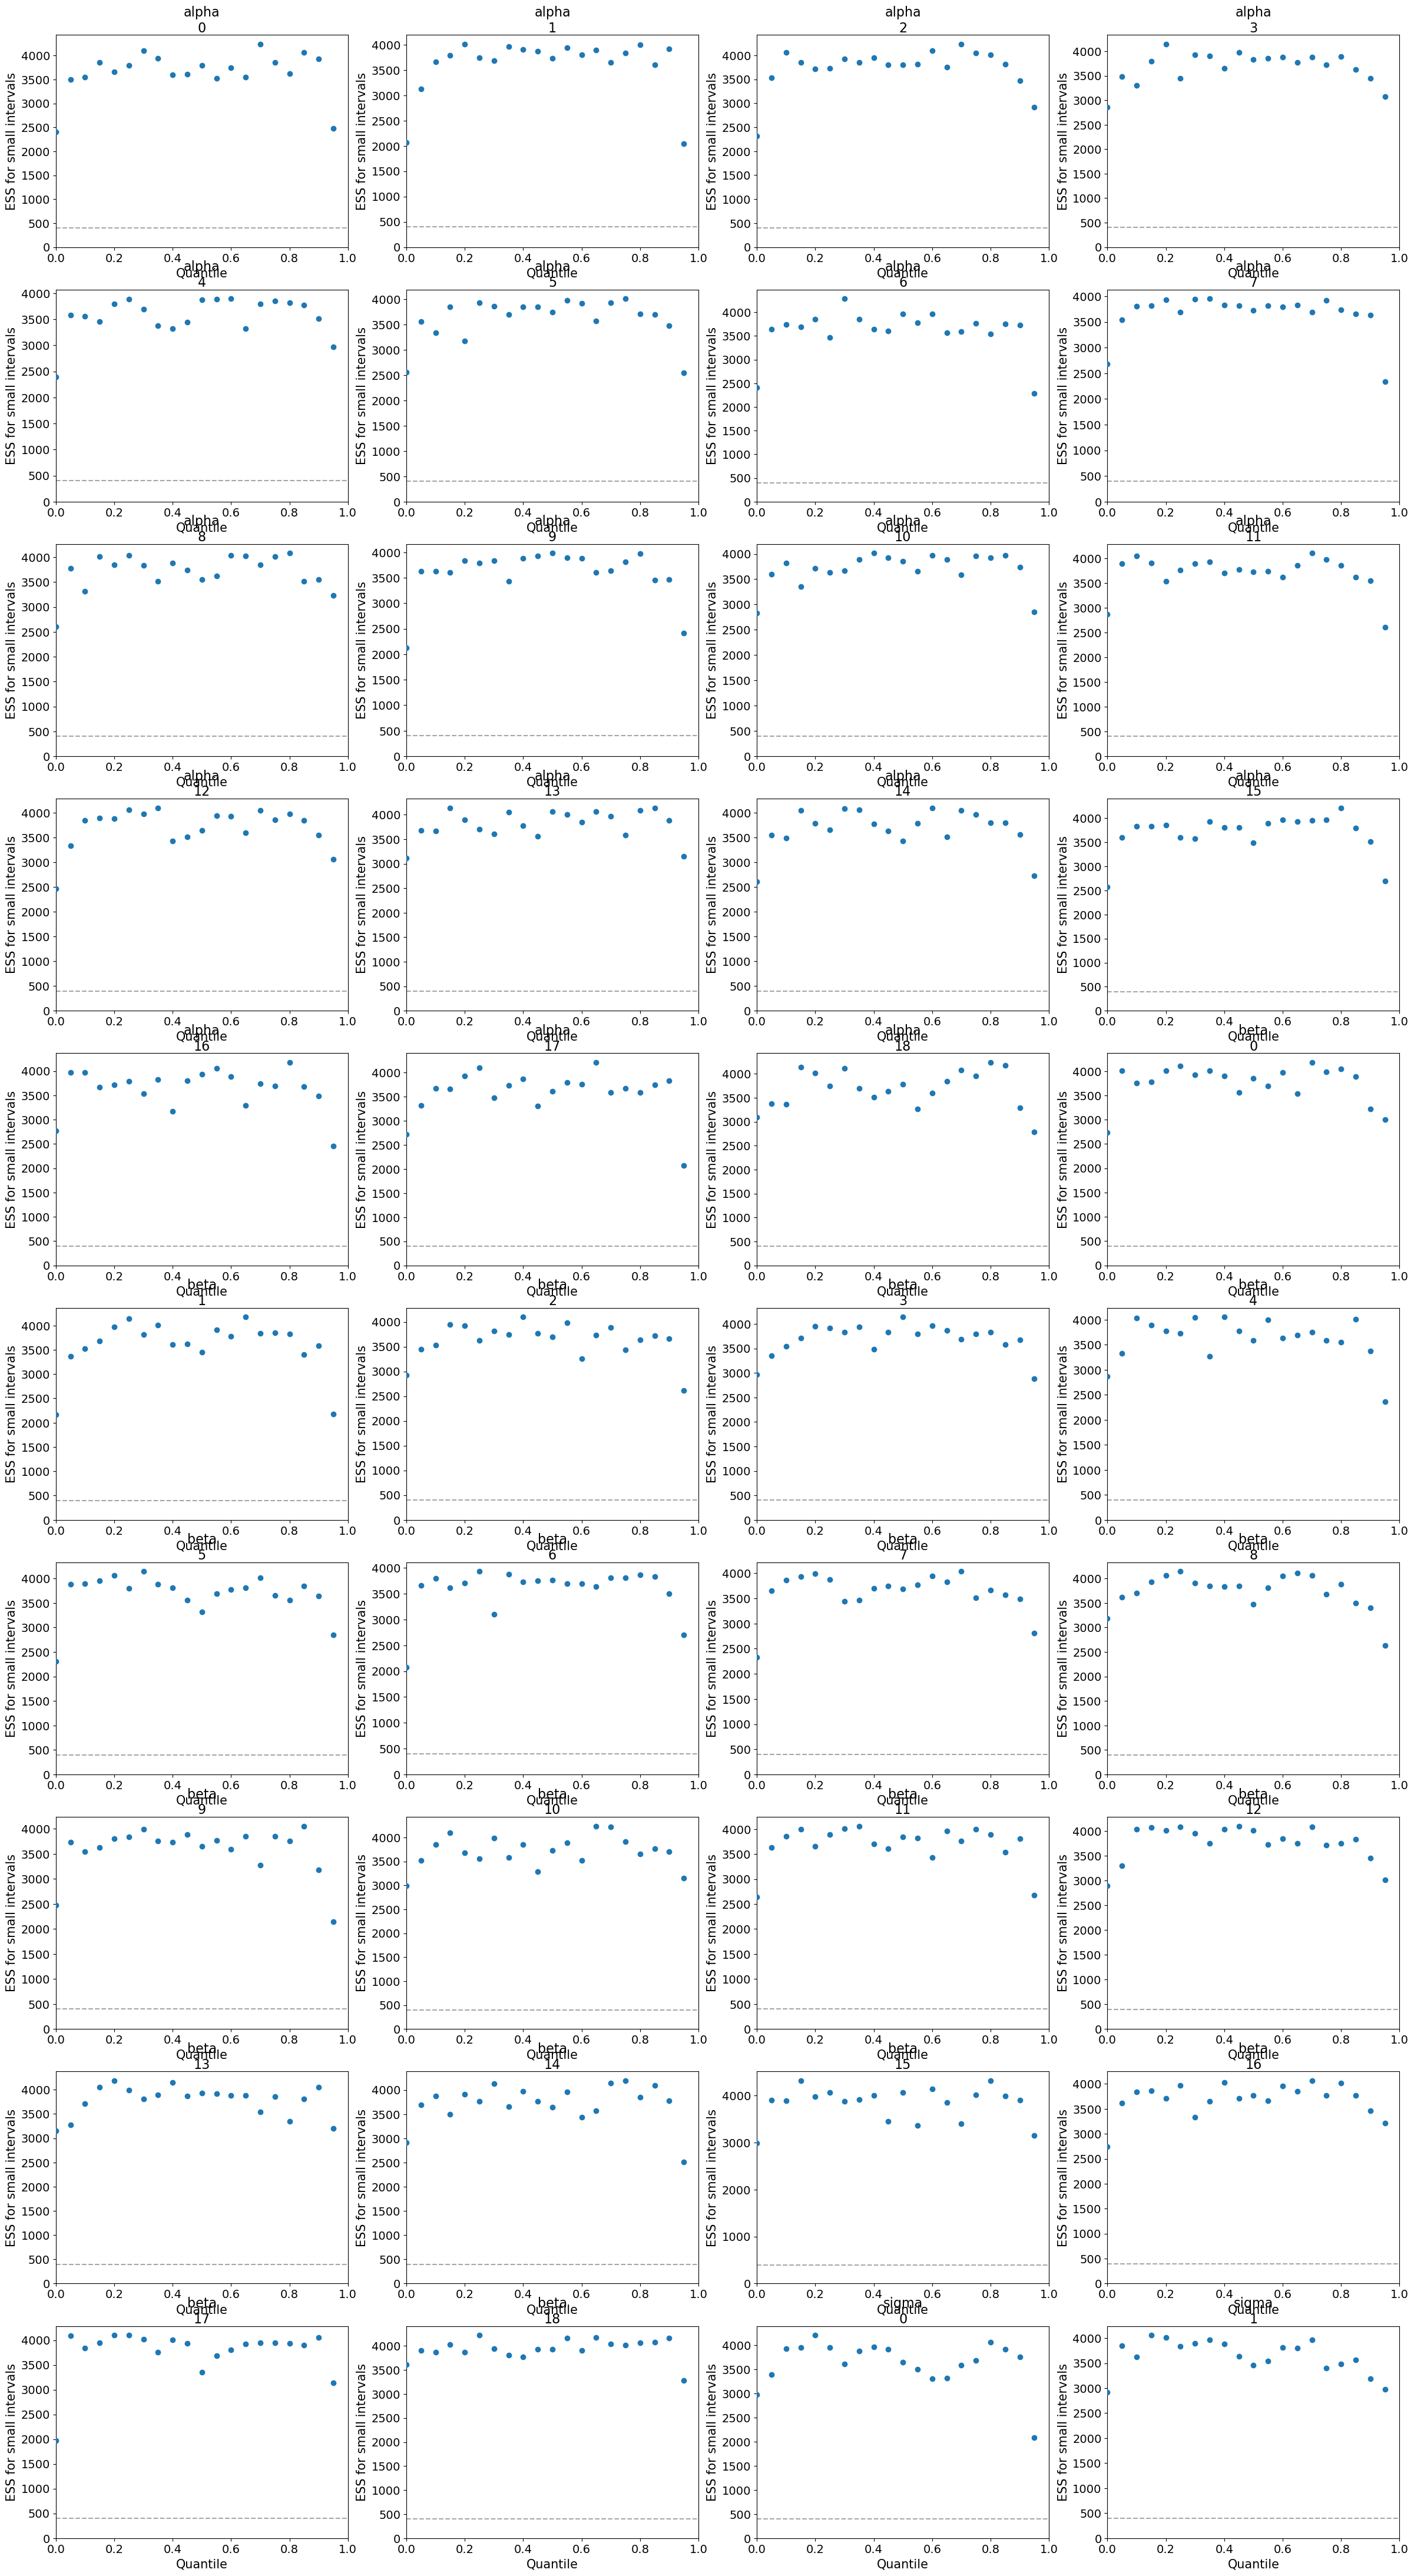

In [86]:
separate_idata = az.from_pystan(posterior=fit_separate)
az.plot_ess(separate_idata, var_names=['alpha', 'beta', 'sigma'], kind='local');

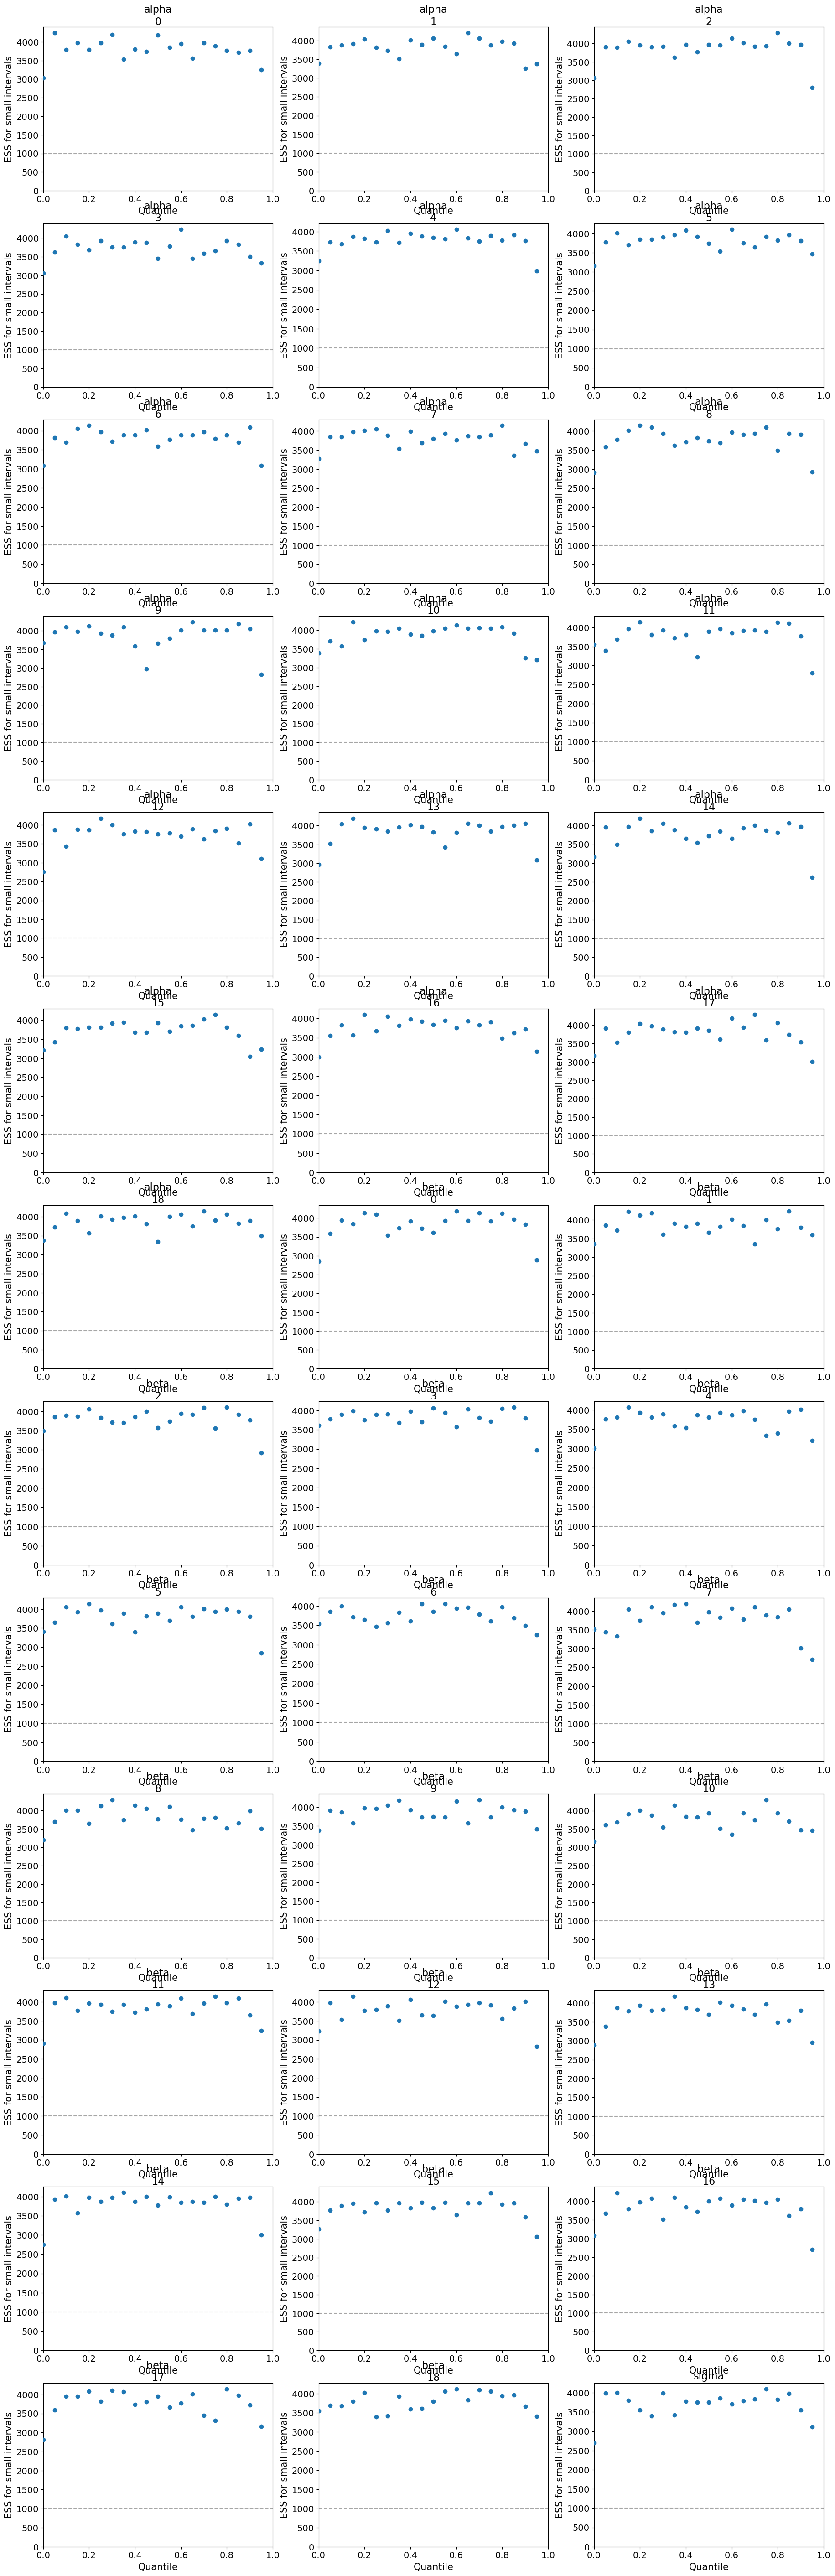

In [89]:
hier_idata = az.from_pystan(posterior=fit_hier)
az.plot_ess(hier_idata, var_names=['alpha', 'beta', 'sigma'], kind='local', min_ess=1000);

In [105]:
diagnostics = hier_summary[["mean", "r_hat", "ess_bulk", "ess_tail"]]
diagnostics[100:120]

,mean,r_hat,ess_bulk,ess_tail
"mu[2, 13]",16.105,1.0,4003.0,2592.0
"mu[2, 14]",15.727,1.0,4031.0,2609.0
"mu[2, 15]",15.348,1.0,4067.0,2745.0
"mu[2, 16]",14.970,1.0,4106.0,2842.0
"mu[2, 17]",14.592,1.0,4136.0,3023.0
"mu[2, 18]",14.214,1.0,4165.0,3170.0
"mu[2, 19]",13.836,1.0,4187.0,3400.0
"mu[2, 20]",13.458,1.0,4209.0,3426.0
"mu[2, 21]",13.080,1.0,4231.0,3506.0
"mu[3, 0]",22.970,1.0,4387.0,3063.0


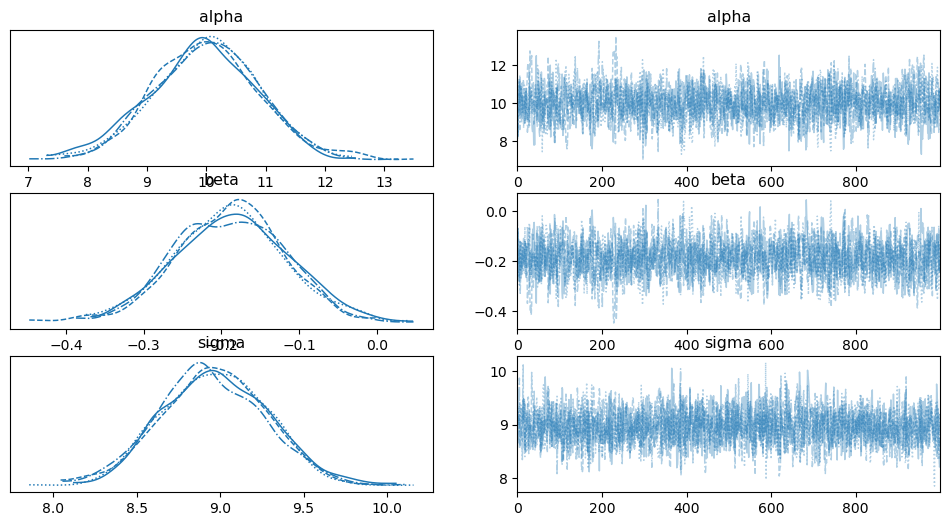

In [110]:
az.plot_trace(pooled_idata, var_names=['alpha', 'beta', 'sigma']);

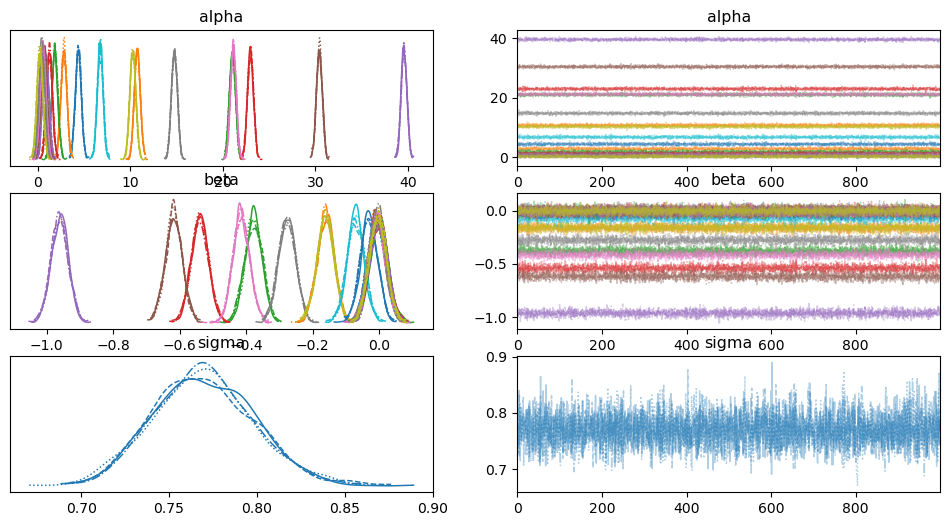

In [135]:
_ = az.plot_trace(hier_idata, var_names=['alpha', 'beta', 'sigma']);

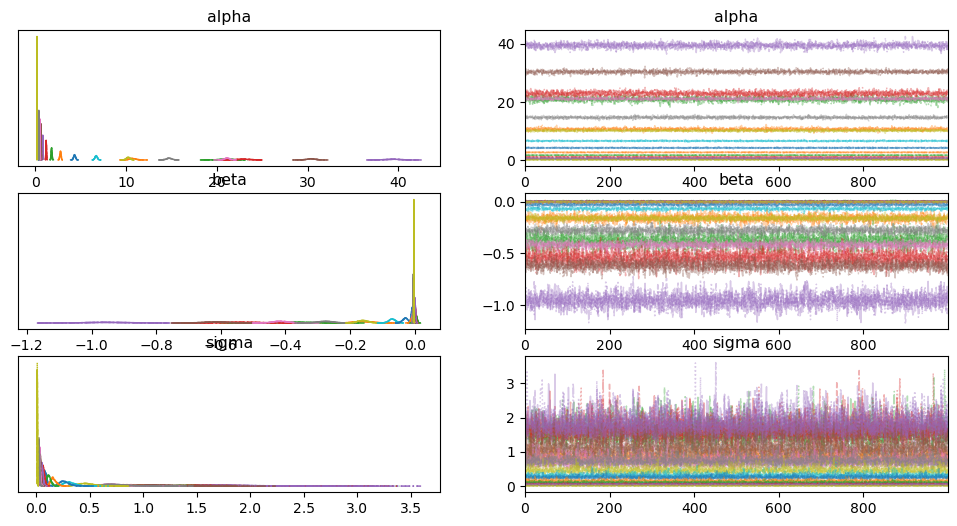

In [126]:
az.plot_trace(separate_idata, var_names=['alpha', 'beta', 'sigma']);

In [119]:
fit_separate

<stan.Fit>
Parameters:
    alpha: (19,)
    beta: (19,)
    sigma: (19,)
    mu: (19, 22)
    yrep: (19, 22)
    pred: (19,)
Draws: 4000